In [1]:
import matplotlib.pyplot as pyplot
import numpy

# Question 1

In [2]:
def knapsack(x, weights, values, weight_limit, r, beta):
    f = numpy.dot(x, values)
    g = numpy.dot(x, weights)
    penalty = r*numpy.max([0, g - weight_limit])**beta
    return f - penalty

In [3]:
def f(v, x):
    return numpy.dot(v, x)

In [4]:
def g(w, x):
    return numpy.dot(w, x)

In [5]:
x = numpy.array([1,0,1])
w = numpy.array([100, 200, 300])
v = numpy.array([1, 2, 3])
W = 400
r = 20
b = 2
print(knapsack(x, w, v, W, r, b))

4


# Question 2

In [6]:
def randomPop(n_rows, n_cols):
    return numpy.random.randint(0, 1+1, size=(n_rows, n_cols))

In [7]:
print(randomPop(4,2))

[[0 0]
 [0 0]
 [0 1]
 [0 0]]


# Question 3

In [8]:
def truncation(f_vector, k=4, s=2, maximise=True):
    if maximise:
        indexes = numpy.argsort(-f_vector)[:k]
    else:
        indexes = numpy.argsort(f_vector)[:k]
    return numpy.random.choice(indexes, size=s, replace=False)

In [9]:
fv = numpy.array([1,2,4,6,-23])
truncation(fv)

array([3, 1], dtype=int64)

# Question 4

In [10]:
def onePoint(a, b):
    inds = numpy.arange(a.shape[0])
    point = numpy.random.choice(inds)
    #print(point)
    c = numpy.concatenate([a[:point], b[point:]])
    d = numpy.concatenate([b[:point], a[point:]])
    return c, d

In [11]:
print(onePoint([1,3,4,3],[9,5,62,23]))

AttributeError: 'list' object has no attribute 'shape'

# Question 5

In [12]:
def bitwise_mutation(c, probability=None):
    if probability is None:
        probability = 1/len(c)
    bits = []
    for i in range(len(c)):
        random = numpy.random.random()
        n = c[i]
        if random < probability:
            if n == 1:
                n = 0
            else:
                n = 1
        bits.append(n)
    return numpy.array(bits)

In [13]:
print(bitwise_mutation([0,1,1,0,0,0,1]))

[0 1 0 0 0 0 1]


# Question 6

In [17]:
def GA(func, K, mut_rate=0.2, cx_rate=0.8, n_rows=10, n_cols=8,
      args=(), maximise=True):
    P = randomPop(n_rows, n_cols)
    f_vector = numpy.array([func(i, *args) for i in P])
    if maximise:
        sorted_inds = numpy.argsort(-f_vector)
    else:
        sorted_inds = numpy.argsort(f_vector)
    xbest = [P[sorted_inds[0]]]
    fbest = [f_vector[sorted_inds[0]]]
    for i in range(K+1):
        pinds = truncation(f_vector, maximise=maximise)
        a, b = P[pinds][0], P[pinds][1]
        pcx = numpy.random.random()
        if pcx < cx_rate:
            c1, c2 = onePoint(a, b)
        else:
            c1, c2 = numpy.array(a), numpy.array(b)
        pm = numpy.random.random()
        if pcx < mut_rate:
            c1p = bitwise_mutation(c1)
            c2p = bitwise_mutation(c2)
        else:
            c1p, c2p = numpy.array(c1), numpy.array(c2)
        Pnew = numpy.concatenate([P, c1p[numpy.newaxis,:], 
                               c2p[numpy.newaxis,:]])
        f_vector = numpy.array([func(i, *args) for i in Pnew])
        if maximise:
            sorted_inds = numpy.argsort(-f_vector)
        else:
            sorted_inds = numpy.argsort(f_vector)
        P = Pnew[sorted_inds][:n_rows]
        f_vector = f_vector[sorted_inds][:n_rows]
        xbest.append(P[0])
        fbest.append(f_vector[0])
    return P, f_vector, xbest, fbest

In [18]:
K = 1000
w = numpy.array([600, 180, 250, 500, 400, 250, 380, 400])
v = numpy.array([1.35, 2.25, 2.5, 2.5, 1.75, 2.5, 2, 3.5])
W = 1200
r = 2
beta = 1
args = (w, v, W, r, beta)

In [19]:
res = GA(knapsack, K, args=args)
print(res)

[ -592.65 -2246.15     4.25 -3004.15 -2146.4   -293.65  -808.    -153.75
  -153.9  -1009.  ]
(array([[0, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1, 0, 1],
       [0, 1, 1, 0, 0, 1, 0, 1]]), array([10.75, 10.75, 10.75, 10.75, 10.75, 10.75, 10.75, 10.75, 10.75,
       10.75]), [array([0, 0, 1, 0, 1, 0, 0, 0]), array([0, 0, 1, 0, 1, 0, 0, 0]), array([0, 0, 1, 0, 1, 0, 0, 0]), array([0, 0, 1, 0, 1, 0, 0, 0]), array([0, 0, 1, 0, 1, 0, 0, 0]), array([0, 0, 1, 0, 1, 0, 0, 0]), array([0, 0, 1, 0, 1, 0, 0, 0]), array([0, 0, 1, 0, 1, 0, 0, 0]), array([0, 0, 1, 0, 1, 0, 0, 0]), array([0, 0, 1, 0, 1, 0, 0, 0]), array([0, 0, 1, 0, 1, 0, 1, 0]), array([0, 0, 1, 0, 1, 0, 1, 0]), array([0, 0, 1, 0, 1, 0, 1, 0]), array([0, 0, 1, 0, 1, 0, 1, 0]), array([0, 0, 1, 0, 1, 0, 

# Question 7

Text(0, 0.5, 'Best Fitness Value')

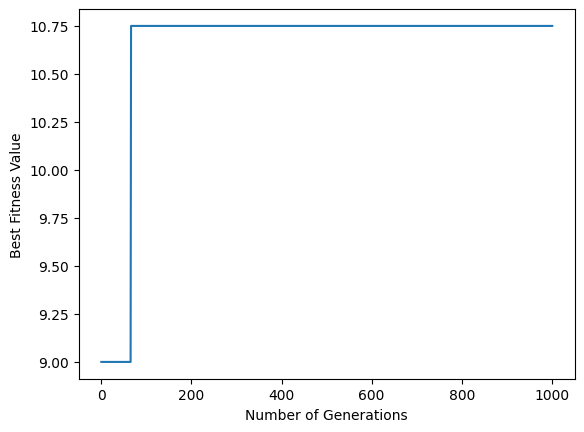

In [92]:
pyplot.plot(res[-1])
pyplot.xlabel("Number of Generations")
pyplot.ylabel("Best Fitness Value")

# Question 8

In [94]:
res[0][numpy.argmax(res[1])],numpy.max(res[1])

(array([0, 1, 1, 0, 0, 1, 0, 1]), 10.75)